In [100]:
import json
import pandas as pd
import numpy as np
import re
import math
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import openpyxl
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
! jupyter notebook --NotebookApp.iopub_data_rate_limit=2147483647

[I 09:24:20.233 NotebookApp] The port 8888 is already in use, trying another port.
[I 09:24:20.253 NotebookApp] [jupyter_nbextensions_configurator] enabled 0.4.1
[I 09:24:20.253 NotebookApp] Serving notebooks from local directory: /Users/siruozhang/Desktop
[I 09:24:20.253 NotebookApp] The Jupyter Notebook is running at:
[I 09:24:20.253 NotebookApp] http://localhost:8889/?token=f5a9d43e5f6967ebfadc25bdfc8a9b02833f50cd4256f878
[I 09:24:20.253 NotebookApp] Use Control-C to stop this server and shut down all kernels (twice to skip confirmation).
[C 09:24:20.259 NotebookApp] 
    
    To access the notebook, open this file in a browser:
        file:///Users/siruozhang/Library/Jupyter/runtime/nbserver-10259-open.html
    Or copy and paste one of these URLs:
        http://localhost:8889/?token=f5a9d43e5f6967ebfadc25bdfc8a9b02833f50cd4256f878


In [2]:
##read json data

file_name = "/Users/siruozhang/Desktop/dkdata.json"
f_obj = open(file_name)
data = json.load(f_obj)
col_names=data['data'][1].keys()

In [3]:
lista=[]
for i in col_names:
    lista.append(i)

In [236]:
##Transform into pd.dataframe
df = pd.DataFrame(data['data'],columns=lista)  
df.head()
print(df.info())
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16940 entries, 0 to 16939
Data columns (total 23 columns):
payer_name                  16940 non-null object
payer_jurisdiction          16940 non-null object
payer_account               16825 non-null object
source_file                 16940 non-null object
amount_orig                 16940 non-null float64
id                          16940 non-null int64
beneficiary_type            16940 non-null object
beneficiary_core            16940 non-null bool
amount_orig_currency        16940 non-null object
beneficiary_name            16940 non-null object
beneficiary_jurisdiction    16940 non-null object
investigation               16940 non-null object
beneficiary_bank_country    16936 non-null object
beneficiary_name_norm       16940 non-null object
payer_core                  16940 non-null bool
beneficiary_account         16936 non-null object
purpose                     16940 non-null object
date                        16940 non-null ob

,amount_orig,id,amount_usd
count,1.694000e+04,16940.000000,1.694000e+04
mean,-1.723691e+04,8470.500000,3.600683e+05
std,9.050894e+05,4890.301115,7.294666e+05
min,-1.460348e+07,1.000000,1.000000e+00
25%,-1.471078e+05,4235.750000,2.102275e+04
50%,-2.589082e+04,8470.500000,9.286700e+04
75%,-5.037500e+02,12705.250000,3.611420e+05
max,2.055997e+07,16940.000000,2.055997e+07


In [5]:
##clean amount_eur column and create a new column named as eur
df['eur']=df['amount_eur'].str.replace('$','').str.replace(',','').astype(float)


In [212]:
df['amount_eur']

0          $431,762.31
1          $423,688.44
2           $71,698.53
3           $71,686.50
4               $47.52
5          $189,352.15
6          $178,859.87
7          $103,200.00
8           $94,000.00
9           $63,355.28
10          $55,435.87
11          $47,516.46
12          $43,556.76
13          $41,972.87
14          $29,250.34
15          $27,022.61
16           $3,567.69
17           $4,414.00
18             $791.94
19              $22.91
20         $118,791.15
21         $118,791.15
22         $125,786.00
23         $150,000.00
24         $145,150.00
25          $87,984.65
26          $72,400.00
27          $68,366.00
28          $25,342.11
29          $18,598.73
             ...      
16910      $105,000.00
16911       $91,000.00
16912       $60,210.00
16913       $66,338.00
16914       $64,825.00
16915       $55,007.00
16916       $40,888.28
16917       $32,069.24
16918       $25,000.00
16919       $20,043.28
16920       $21,839.20
16921       $16,034.62
16922      

In [6]:
df1 = df.drop('amount_eur',axis=1)


In [163]:
df1[df1['beneficiary_core']==True][['eur','amount_orig_currency','amount_usd','payer_name_norm']]



,eur,amount_orig_currency,amount_usd,payer_name_norm
0,431762.31,USD,535470,AZARBAYCAN METANOL KOMPANI MMC
2,71698.53,USD,90536,SKN ELECTRICAL SERVICES LIMITED
5,189352.15,EUR,239099,INMAXO CAPITAL CORP.
6,178859.87,USD,225850,INMAXO CAPITAL CORP.
19,22.91,USD,29,INMAXO CAPITAL CORP.
20,118791.15,USD,150000,LOTA SALES LLP
21,118791.15,USD,150000,MOBILA LLP
36,1152.27,USD,1455,LOTA SALES LLP
37,1187.91,USD,1500,Danske Bank A/S Estonia branch
38,103190.00,EUR,130301,JETFIELD NETWORKS LIMITED


In [232]:
## check money inflow or outflow destination 
print(df1[(df1['beneficiary_core']==True)& (df1['amount_orig']>0)]['amount_orig_currency'].value_counts())
print(df1[(df1['payer_core']==True)& (df1['amount_orig']<0)]['amount_orig_currency'].value_counts())



USD    3448
EUR     590
RUB      15
GBP      12
CHF       4
Name: amount_orig_currency, dtype: int64
USD    8584
EUR    3964
RUB     140
GBP     114
CHF      67
SEK       2
Name: amount_orig_currency, dtype: int64


In [8]:
miss_value_index={}
for i in ['payer_account','payer_bank_country','beneficiary_account','beneficiary_bank_country']:
    miss_value_index[i]=df1[df1[i].isna()].index.tolist()
miss_value_index['payer_account']==miss_value_index['payer_bank_country']
miss_value_index['beneficiary_account']==miss_value_index['beneficiary_bank_country']
print(miss_value_index)


{'payer_account': [67, 121, 308, 451, 509, 603, 1210, 1211, 2923, 3084, 3508, 3510, 3677, 4229, 4441, 4823, 5073, 5124, 5126, 5590, 6232, 6234, 6236, 6237, 6385, 6493, 6636, 6643, 6646, 6703, 6733, 7277, 7279, 7449, 7704, 7785, 7786, 7789, 7793, 7796, 7799, 7803, 7807, 7836, 7837, 7838, 7842, 7844, 7845, 7850, 7892, 7898, 7899, 7901, 7938, 8060, 8061, 8062, 8063, 8137, 8144, 8275, 8479, 8694, 9094, 9095, 9385, 9481, 9606, 9704, 9929, 9930, 9931, 9935, 10121, 10123, 10944, 11286, 11382, 11820, 11821, 11824, 11825, 11925, 11926, 12014, 12160, 12383, 12572, 12599, 12829, 12872, 12873, 12900, 12901, 12940, 12941, 12943, 12946, 12948, 12949, 12974, 12975, 13274, 13536, 14156, 14317, 15343, 15613, 15993, 16089, 16171, 16285, 16288, 16692], 'payer_bank_country': [67, 121, 308, 451, 509, 603, 1210, 1211, 2923, 3084, 3508, 3510, 3677, 4229, 4441, 4823, 5073, 5124, 5126, 5590, 6232, 6234, 6236, 6237, 6385, 6493, 6636, 6643, 6646, 6703, 6733, 7277, 7279, 7449, 7704, 7785, 7786, 7789, 7793, 7796, 

In [9]:
df1.iloc[miss_value_index['beneficiary_bank_country']]



,payer_name,payer_jurisdiction,payer_account,source_file,amount_orig,id,beneficiary_type,beneficiary_core,amount_orig_currency,beneficiary_name,...,beneficiary_name_norm,payer_core,beneficiary_account,purpose,date,amount_usd,payer_type,payer_name_norm,payer_bank_country,eur
306,METASTAR INVEST LLP,GB,EE77 3300 3334 8704 0004,pdf/METASTAR Account statement 30.06.12-31.12....,-1800.0,10738,Company,False,USD,CONTINENTAL ENGINES,...,CONTINENTAL ENGINES,True,None,1208105026359433 ORDER NUMBER NO 1179550 DD 18...,2012-08-10,1800,Company,METASTAR INVEST LLP,EE,1468.05
3598,METASTAR INVEST LLP,GB,EE77 3300 3334 8704 0004,pdf/METASTAR Account statement 30.06.12-31.12....,-2909.5,15956,Company,False,USD,MICROCOPY,...,MICROCOPY,True,None,1302265026564645 INVOICE SO12000014 DD 13/12/2...,2013-02-26,2910,Company,METASTAR INVEST LLP,EE,2131.43
8782,METASTAR INVEST LLP,GB,EE77 3300 3334 8704 0004,pdf/METASTAR Account statement 30.06.12-31.12....,-4311.0,16287,Company,False,USD,MICROCOPY,...,MICROCOPY,True,None,1307175022068793 INVOICE SOM1300027 DD 08/07/2...,2013-07-17,4311,Company,METASTAR INVEST LLP,EE,3301.41
11302,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Allegato 4.xml,-253150.0,4658,Company,False,USD,TURBILLION LLC,...,TURBILLION LLC,True,None,1311125026365614 PAYMENT TO THE CONTRACT N 121...,2013-11-12,253150,Company,HILUX SERVICES LP,EE,186918.37


In [252]:
## missing value
df1.isnull().sum()

payer_name                    0
payer_jurisdiction            0
payer_account               115
source_file                   0
amount_orig                   0
id                            0
beneficiary_type              0
beneficiary_core              0
amount_orig_currency          0
beneficiary_name              0
beneficiary_jurisdiction      0
investigation                 0
beneficiary_bank_country      4
beneficiary_name_norm         0
payer_core                    0
beneficiary_account           4
purpose                       0
date                          0
amount_usd                    0
payer_type                    0
payer_name_norm               0
payer_bank_country          115
eur                           0
payer_name_new                0
payer_name_norm_new           0
dtype: int64

In [226]:
##Core shell company
np.unique(df1[df1['payer_core']==True]['payer_name'].values)
df1[df1['payer_core']==True]['payer_name_norm_new'].value_counts()
df1[df1['beneficiary_core']==True]['beneficiary_name_norm'].value_counts()



HILUX SERVICES LP      5178
METASTAR INVEST LLP    3846
LCM ALLIANCE LLP       2820
POLUX MANAGEMENT LP    1344
Name: payer_name_norm_new, dtype: int64

In [11]:
df1['payer_jurisdiction'].value_counts()
df1['payer_type'].value_counts()



Company    16877
Invalid       51
Person        12
Name: payer_type, dtype: int64

In [213]:
##clean payer_name_and payer_name_norm
df1['payer_name_new']=df1['payer_name'].str.replace('.','').replace(',','').str.upper()
df1['payer_name_norm_new']=df1['payer_name_norm'].str.replace('.','').str.upper()


In [214]:
## payer_name_norm contains payer_name 

payer_name_not_same1=[]
for i in range(len(df1['payer_name_new'])):
    if df1['payer_name_new'].iloc[i] in df1['payer_name_norm_new'].iloc[i]:
        pass
    else:
        payer_name_not_same1.append(i)
payer_name_not_same2=[]

for i in range(len(df1['payer_name_new'])):
    if df1['payer_name_norm_new'].iloc[i] in df1['payer_name_new'].iloc[i]:
        pass
    else:
        payer_name_not_same2.append(i)
        

intersection= [val for val in payer_name_not_same1 if val in payer_name_not_same2]

intersection


[37,
 40,
 59,
 85,
 105,
 122,
 139,
 149,
 164,
 165,
 166,
 203,
 319,
 420,
 439,
 542,
 550,
 551,
 609,
 628,
 651,
 786,
 807,
 879,
 903,
 1059,
 1217,
 1223,
 1224,
 1243,
 1247,
 1281,
 1284,
 1336,
 1454,
 1468,
 1471,
 1525,
 1598,
 1601,
 1671,
 1699,
 1700,
 1718,
 1721,
 1745,
 1794,
 1827,
 1853,
 1854,
 1977,
 2032,
 2060,
 2096,
 2097,
 2116,
 2149,
 2362,
 2374,
 2414,
 2479,
 2511,
 2517,
 2544,
 2580,
 2584,
 2585,
 2588,
 2685,
 2733,
 2737,
 2780,
 2786,
 2787,
 2788,
 2837,
 2850,
 2861,
 2881,
 2884,
 2885,
 2900,
 2924,
 2958,
 3048,
 3124,
 3129,
 3132,
 3160,
 3185,
 3186,
 3190,
 3191,
 3194,
 3195,
 3196,
 3197,
 3221,
 3222,
 3251,
 3277,
 3297,
 3429,
 3648,
 3687,
 3752,
 4233,
 4307,
 4373,
 4393,
 4420,
 4445,
 4479,
 4481,
 4482,
 4532,
 4618,
 4658,
 4665,
 4666,
 4668,
 4719,
 4727,
 4728,
 4952,
 5000,
 5066,
 5076,
 5139,
 5140,
 5194,
 5202,
 5203,
 5252,
 5254,
 5255,
 5484,
 5585,
 5674,
 6017,
 6042,
 6228,
 6229,
 6321,
 6326,
 6391,
 6496,


In [215]:
def doubt_object_payer_name(n):
    dic={}
    for i in intersection:
        if list(df1['payer_name_norm_new'].iloc[i])[:n] != list(df1['payer_name_new'].iloc[i])[:n]:
            dic[i]=[df1['payer_name_norm_new'].iloc[i],df1['payer_name_new'].iloc[i]]
    return(dic)

a=[]
for k in range(20):
    for i in doubt_object_payer_name(k).keys():
        a.append(doubt_object_payer_name(k)[i])
    print(k,np.unique(a))


0 []
1 ['OJSC ARCELORMITTAL KRYVIY RIH' 'PJSC ARCELORMITTAL KRYVYI RIH,']
2 ['OJSC ARCELORMITTAL KRYVIY RIH' 'PJSC ARCELORMITTAL KRYVYI RIH,']
3 ['AL GHARABALLY NATIONAL TRADING' 'ALGHARABALLY NATIONAL TRADING'
 'APOLLO(CHINA) CO,LTD' 'APPOLLO (CHINA) CO, LTD'
 'OJSC ARCELORMITTAL KRYVIY RIH' 'PJSC ARCELORMITTAL KRYVYI RIH,'
 'ZI WU TRADING CO LIMITED' 'ZI YI TRADING CO LIMITED'
 'ZIWU TRADING CO LIMITED' 'ZIWU TRADING CO LIMITED NO285 LO'
 'ZIWU TRADING CO LIMITED RM289 14/F' 'ZIYI TRADING CO LIMITED']
4 ['AL GHARABALLY NATIONAL TRADING' 'ALGHARABALLY NATIONAL TRADING'
 'APOLLO(CHINA) CO,LTD' 'APPOLLO (CHINA) CO, LTD'
 'HUA HE TRADE CO LIMITED' 'HUA HE TRADE CO LIMITED RM289 14/F'
 'HUA MENG TRADE CO, LTD' 'HUAHE TRADE CO LIMITED'
 'HUAMENG TRADE CO LIMITED' 'HUAMENG TRADE CO LIMITED RM289 14/F'
 'HUAMENG TRADECO LIMITEDRM289 14/F G' 'OJSC ARCELORMITTAL KRYVIY RIH'
 'PJSC ARCELORMITTAL KRYVYI RIH,' 'ZI WU TRADING CO LIMITED'
 'ZI YI TRADING CO LIMITED' 'ZIWU TRADING CO LIMITED'
 'ZIWU

15 ['AL GHARABALLY NATIONAL TRADING' 'ALGHARABALLY NATIONAL TRADING'
 'APOLLO(CHINA) CO,LTD' 'APPOLLO (CHINA) CO, LTD' 'ASTON GLOBAL L P'
 'ASTON GLOBAL LP' 'DANBELL  IMPORT  LLP' 'DANBELL IMPORT LLP'
 'GENTECH (FZE)' 'GENTECH FZE' 'HANSE TRADEING CO LIMITED'
 'HANSE TRADING CO LIMITED' 'HUA HE TRADE CO LIMITED'
 'HUA HE TRADE CO LIMITED RM289 14/F' 'HUA MENG TRADE CO, LTD'
 'HUAHE TRADE CO LIMITED' 'HUAMENG TRADE CO LIMITED'
 'HUAMENG TRADE CO LIMITED RM289 14/F'
 'HUAMENG TRADECO LIMITEDRM289 14/F G' 'LUXBORG L P' 'LUXBORG LP'
 'OJSC ARCELORMITTAL KRYVIY RIH' 'PJSC ARCELORMITTAL KRYVYI RIH,'
 'STILL HAIR ACCESSORY CO, LIMITED' 'STILL HAIRA ACCESSORY CO LIMITED'
 "TOO 'ARMAS GROUP'" 'TOO ARMAS GROUP' 'VOSTOK MEDIA ECHANGE LTD'
 'VOSTOK MEDIA EXCHANGE LTD' 'YW THEHAAM CO LIMITED'
 'YW THEHAAM CO, LIMITED' 'YW THEHAAM CO,LIMITED'
 'ZI WU TRADING CO LIMITED' 'ZI YI TRADING CO LIMITED'
 'ZIWU TRADING CO LIMITED' 'ZIWU TRADING CO LIMITED NO285 LO'
 'ZIWU TRADING CO LIMITED RM289 14/F' 'ZIY

In [16]:
print(df1['payer_bank_country'].value_counts())
print(df1['payer_jurisdiction'].value_counts())



EE    13147
33     2083
AZ      562
LV      270
KZ      201
CY      135
40       72
NR       67
OS       50
CH       37
NL       30
AE       26
20       20
10       16
TR       12
60       11
LI        8
38        7
GE        7
00        6
DE        5
MT        4
TX        4
06        4
TA        4
39        3
CZ        3
12        2
LT        2
41        2
IT        2
01        2
MD        2
36        2
90        2
DK        2
BG        1
55        1
35        1
26        1
66        1
BE        1
11        1
LU        1
RO        1
50        1
87        1
QA        1
FR        1
Name: payer_bank_country, dtype: int64
GB         15074
AZ           609
UNKNOWN      205
KZ           201
NZ           134
CY           132
CN           108
RU            76
HK            71
DE            41
US            40
CA            37
VG            34
AE            33
TR            26
PA            19
ES            16
EE            15
FI            11
MT             9
GE             7
SG             4

In [15]:
a1=[]
for i in range(len(df1['beneficiary_bank_country'])):
    if df1['beneficiary_bank_country'].iloc[i] is not None:
        if len(list(df1['beneficiary_bank_country'].iloc[i])) != 2:
            a1.append(i)
print(a1)
#df['beneficiary_bank_country'].value_counts()
#all benficiary bank country have 2 character except null.

a2=[]
for i in range(len(df1['payer_bank_country'])):
    if df1['payer_bank_country'].iloc[i] is not None:
        if len(list(df1['payer_bank_country'].iloc[i])) != 2:
            a1.append(i)
print(a2)
#all payer bank country have 2 character except null.

[]
[]


In [16]:
a3=[]
for i in range(len(df1['beneficiary_bank_country'])):
    if (df1['beneficiary_bank_country'].iloc[i] is not None) and (df1['beneficiary_account'].iloc[i] is not None):
        if (list(df1['beneficiary_bank_country'].iloc[i])[:2]) != (list(df1['beneficiary_account'].iloc[i])[:2]):
            a3.append(i)
print(a3)


a4=[]
for i in range(len(df1['payer_bank_country'])):
    if (df1['payer_bank_country'].iloc[i] is not None) and (df1['payer_account'].iloc[i] is not None):
        if (list(df1['payer_bank_country'].iloc[i])[:2]) != (list(df1['payer_account'].iloc[i])[:2]):
            a4.append(i)
print(a4)
#_bank country info can get from account



[]
[]


In [19]:
#df1[df1['amount_orig']<0]['payer_jurisdiction'].value_counts()
#df1[(df1['amount_orig']>0) & (df1['payer_jurisdiction']=='GB')]
#df1['beneficiary_bank_country'].value_counts()
#df1[df1['amount_orig']<0]['beneficiary_core'].value_counts()
#df1[df1['payer_core']==True]['payer_name'].value_counts()
#df1[df1['beneficiary_core']==True]['beneficiary_name'].value_counts()

##clean source file 
## sourcefile ensure the entity of a transaction record
a4=[]
for i in range(len(df1['source_file'])):
    a4.append(re.findall(r'/(.*) [Account|Allegato]',df1['source_file'].iloc[i])[0])
a12=[]
a6=[]
for i in range(len(df1['amount_orig'])):
    if df1['amount_orig'].iloc[i]<0:
        a6.append(i)

In [17]:
pd.set_option('display.max_columns', None)


In [20]:
a5=[]
for i in a6:
        if a4[i][0] not in df1['payer_name_norm'].iloc[i]:
            a5.append(i)
len(a5)
# amount<0, sources names belong to payer_name
a61=[]
for i in a6:
    a61.append(a4[i][0])
print(np.unique(a61))
df1['payer_name_norm'][(df1['payer_core']==True)].value_counts()



['H' 'L' 'M' 'P']


HILUX SERVICES LP      5178
METASTAR INVEST LLP    3846
LCM ALLIANCE LLP       2820
POLUX MANAGEMENT LP    1344
Name: payer_name_norm, dtype: int64

In [21]:
a51=[]
for i in range(len(df1['source_file'])):
    if df1['amount_orig'].iloc[i]>=0:
        if a4[i][0] not in df1['beneficiary_name_norm'].iloc[i]:
            a51.append(i)
len(a51)

aa=[]

for i in range(len('source_file')):
    if df1['payer_name_norm'].iloc[i] == df1['beneficiary_name_norm'].iloc[i]:
        aa.append(i)
print(aa)
#no same company at payer and bene
# amount>0, sources name belong to bene_name 

#Thus, I think amount +/- does not effect on data


[]


In [240]:
df1[['amount_orig','eur','amount_orig_currency','amount_usd']]

,amount_orig,eur,amount_orig_currency,amount_usd
0,535470.00,431762.31,USD,535470
1,-535000.00,423688.44,USD,535000
2,90535.19,71698.53,USD,90536
3,-90520.00,71686.50,USD,90520
4,-60.00,47.52,USD,60
5,189352.15,189352.15,EUR,239099
6,225850.00,178859.87,USD,225850
7,-103200.00,103200.00,EUR,130313
8,-94000.00,94000.00,EUR,118696
9,-80000.00,63355.28,USD,80000


In [22]:
currency_detect=[]
for i in range(len(df1['amount_orig'])):
    if df1['amount_orig_currency'].iloc[i]=='USD':
        if df1['amount_usd'].iloc[i]!= math.ceil(abs(df1['amount_orig'].iloc[i])):
            currency_detect.append(i)
    if df1['amount_orig_currency'].iloc[i]=='EUR':
        if math.ceil(df1['eur'].iloc[i]) != math.ceil(abs(df1['amount_orig'].iloc[i])):
            currency_detect.append(i)
print(currency_detect)
df1['amount_orig_currency'].value_counts()
# I think keep usd is safe
#investigation only one level,thus drop
df2=df1.drop(['amount_orig','eur','amount_orig_currency','payer_name','payer_name_new','investigation','beneficiary_name','source_file'],axis=1)

[]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16940 entries, 0 to 16939
Data columns (total 17 columns):
payer_jurisdiction          16940 non-null object
payer_account               16825 non-null object
id                          16940 non-null int64
beneficiary_type            16940 non-null object
beneficiary_core            16940 non-null bool
beneficiary_jurisdiction    16940 non-null object
beneficiary_bank_country    16936 non-null object
beneficiary_name_norm       16940 non-null object
payer_core                  16940 non-null bool
beneficiary_account         16936 non-null object
purpose                     16940 non-null object
date                        16940 non-null object
amount_usd                  16940 non-null int64
payer_type                  16940 non-null object
payer_name_norm             16940 non-null object
payer_bank_country          16825 non-null object
payer_name_norm_new         16940 non-null object
dtypes: bool(2), int64(2), object(13)
memory

In [23]:
date_=[]
for i in range(len(df1['source_file'])):
    date_.append(re.findall(r'\d*.\d*.\d*-\d*.\d*.\d*',df1['source_file'].iloc[0])[0])
np.unique(date_)
#all number look like date are same
df2['source']=a4
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16940 entries, 0 to 16939
Data columns (total 18 columns):
payer_jurisdiction          16940 non-null object
payer_account               16825 non-null object
id                          16940 non-null int64
beneficiary_type            16940 non-null object
beneficiary_core            16940 non-null bool
beneficiary_jurisdiction    16940 non-null object
beneficiary_bank_country    16936 non-null object
beneficiary_name_norm       16940 non-null object
payer_core                  16940 non-null bool
beneficiary_account         16936 non-null object
purpose                     16940 non-null object
date                        16940 non-null object
amount_usd                  16940 non-null int64
payer_type                  16940 non-null object
payer_name_norm             16940 non-null object
payer_bank_country          16825 non-null object
payer_name_norm_new         16940 non-null object
source                      16940 non-null obje

In [160]:
df2[['purpose','beneficiary_account','payer_account']][(df2['payer_type']=='Invalid')|(df2['payer_type']=='Person')]



,payer_jurisdiction,payer_account,id,beneficiary_type,beneficiary_core,beneficiary_jurisdiction,beneficiary_bank_country,beneficiary_name_norm,payer_core,beneficiary_account,purpose,date,amount_usd,payer_type,payer_name_norm,payer_bank_country,payer_name_norm_new,source
67,DE,None,9327,Company,True,GB,EE,METASTAR INVEST LLP,False,EE77 3300 3334 8704 0004,1207185100280220 RTN 1207135025890645/7033/ 13...,2012-07-19,167676,Invalid,DEUTDEFFXXX,None,DEUTDEFFXXX,METASTAR
121,CN,None,10669,Company,True,GB,EE,METASTAR INVEST LLP,False,EE77 3300 3334 8704 0004,1207245104516412 345587 INMAXO CAPITAL CORP./...,2012-07-24,49963,Invalid,BKCHCNBJ,None,BKCHCNBJ,METASTAR
308,DE,None,9386,Company,True,GB,EE,METASTAR INVEST LLP,False,EE77 3300 3334 8704 0004,1208095105222495 RETURN OF P/O 159/12073050228...,2012-08-10,81992,Invalid,DEUTDEFFXXX,None,DEUTDEFFXXX,METASTAR
451,TR,None,10778,Company,True,GB,EE,METASTAR INVEST LLP,False,EE77 3300 3334 8704 0004,1208275104667672 RTN P/O 1207265020271628/132...,2012-08-27,36920,Invalid,DENITRIS,None,DENITRIS,METASTAR
476,TR,TR500006200009100009097093,10785,Company,True,GB,EE,METASTAR INVEST LLP,False,EE77 3300 3334 8704 0004,1208285105855742 /RFB/GOODS VALUE,2012-08-28,67955,Person,SEMRA UZUNCIMEN,TR,SEMRA UZUNCIMEN,METASTAR
509,US,None,15673,Company,True,GB,EE,METASTAR INVEST LLP,False,EE77 3300 3334 8704 0004,1208305106394756 RTN P/O 1208225027994320/301...,2012-08-30,4000,Invalid,TDOMUS33,None,TDOMUS33,METASTAR
603,GB,None,10581,Company,True,GB,EE,METASTAR INVEST LLP,False,EE77 3300 3334 8704 0004,1209055105244285 RTN P/O 1208315022336943/361...,2012-09-05,15872,Invalid,BARCGB22,None,BARCGB22,METASTAR
1211,DE,None,15136,Company,True,GB,EE,METASTAR INVEST LLP,False,EE77 3300 3334 8704 0004,1210125104899072 RTN P/O 1210105026740299/638...,2012-10-12,1601,Invalid,NORSDE71,None,NORSDE71,METASTAR
1679,CZ,CZ7355000000004054712001,5432,Company,True,GB,EE,LCM ALLIANCE LLP,False,EE27 3300 3335 0561 0002,1211095103858410 31000121109E00040010000001 EB...,2012-11-09,71043,Person,RASHAD GAFAROV,CZ,RASHAD GAFAROV,LCM ALLIANCE
2583,AZ,TXID/AZ/1300959901,11223,Company,True,GB,EE,METASTAR INVEST LLP,False,EE77 3300 3334 8704 0004,1212245101390337 PREPAYMENT DUE TO CONT.08/11 ...,2012-12-27,149455,Person,AZERB.REP.MINIST.EMERGENCY SITUA,TX,AZERBREPMINISTEMERGENCY SITUA,METASTAR


In [24]:
df['beneficiary_type'].value_counts()

Company    15998
Person       932
Invalid       10
Name: beneficiary_type, dtype: int64

In [25]:
df2['payer_account']
df2['payer_bank_country']
country=[]
for i in range(len(df2['payer_account'])):
    if (df2['payer_account'].iloc[i]!=None) & (df2['payer_bank_country'].iloc[i]!=None):
        if (list(df2['payer_account'].iloc[i])[:2])!=(list(df2['payer_bank_country'].iloc[i])[:2]):
            country.append(i)
country

country1=[]
for i in range(len(df2['beneficiary_account'])):
    if (df2['beneficiary_account'].iloc[i]!=None) & (df2['beneficiary_bank_country'].iloc[i]!=None):
        if (list(df2['beneficiary_account'].iloc[i])[:2])!=(list(df2['beneficiary_bank_country'].iloc[i])[:2]):
            country1.append(i)
country1

##account first 2 letter == bank country if not none

[]

In [26]:
pd.options.mode.chained_assignment = None
df2['payer_account']=df['payer_account']
df2['beneficiary_account']=df['beneficiary_account']
#try
df2['beneficiary_account'].iloc[0]=''.join(list(df2['beneficiary_account'].iloc[0][2:]))



In [27]:
for i in range(len(df2['payer_account'])):
    if (df2['payer_account'].iloc[i]!=None) :
        df2['payer_account'].iloc[i]=''.join(list(df2['payer_account'].iloc[i])[2:])
df2['payer_account']=df2['payer_account'].str.replace(' ','')


for i in range(1,len(df2['beneficiary_account'])):
    if (df2['beneficiary_account'].iloc[i]!=None):
        df2['beneficiary_account'].iloc[i]=''.join(list(df2['beneficiary_account'].iloc[i])[2:])
df2['beneficiary_account']=df2['beneficiary_account'].str.replace(' ','')
df2['beneficiary_account']
#delete bank country at first two letters and drop space

0               273300333505610002
1                       3504500003
2               773300333487040004
3                       3455870002
4                       3455870002
5               773300333487040004
6               773300333487040004
7                       3488110001
8        78T0605569721000000001000
9                       3484540002
10                      3484540002
11                      3499570009
12        410012300615100016777301
13       78H0306920409100000012385
14        070013400000000039500042
15                      3499570009
16        240006200034100009092916
17            96810700000210018800
18                      3468790001
19              773300333487040004
20              773300333487040004
21              773300333487040004
22              702840722002001727
23           710200000025597675100
24                      3488110001
25                      3488110001
26                      3488110001
27        480006400000212780107701
28            114004

,payer_jurisdiction,payer_account,id,beneficiary_type,beneficiary_core,beneficiary_jurisdiction,beneficiary_bank_country,beneficiary_name_norm,payer_core,beneficiary_account,purpose,date,amount_usd,payer_type,payer_name_norm,payer_bank_country,payer_name_norm_new,source
0,AZ,817018409333311204,6049,Company,True,GB,EE,LCM ALLIANCE LLP,False,273300333505610002,1206295100052180 OCT4121800021 ADVANCE PAYM FO...,2012-06-30,535470,Company,AZARBAYCAN METANOL KOMPANI MMC,33,AZARBAYCAN METANOL KOMPANI MMC,LCM ALLIANCE
1,GB,273300333505610002,6050,Company,False,GB,33,MOBILA LLP,True,3504500003,1207035026699176 INVOICE.No 6215 DD 25.05.2012,2012-07-03,535000,Company,LCM ALLIANCE LLP,EE,LCM ALLIANCE LLP,LCM ALLIANCE
2,GB,100374548222,10623,Company,True,GB,EE,METASTAR INVEST LLP,False,773300333487040004,"1207065103089249 /FEE/USD4,81",2012-07-06,90536,Company,SKN ELECTRICAL SERVICES LIMITED,20,SKN ELECTRICAL SERVICES LIMITED,METASTAR
3,GB,773300333487040004,15589,Company,False,VG,33,INMAXO CAPITAL CORP.,True,3455870002,1207095022358525 DOGOVOR ZAYMA,2012-07-09,90520,Company,METASTAR INVEST LLP,EE,METASTAR INVEST LLP,METASTAR
4,GB,773300333487040004,10624,Company,False,VG,33,INMAXO CAPITAL CORP.,True,3455870002,1207135024578077 DOGOVOR ZAYMA,2012-07-13,60,Company,METASTAR INVEST LLP,EE,METASTAR INVEST LLP,METASTAR
5,VG,3455870002,15030,Company,True,GB,EE,METASTAR INVEST LLP,False,773300333487040004,CONTRACT N 001 DD 24.12.2009,2012-07-13,239099,Company,INMAXO CAPITAL CORP.,33,INMAXO CAPITAL CORP,METASTAR
6,VG,3455870002,15590,Company,True,GB,EE,METASTAR INVEST LLP,False,773300333487040004,1207135026233261 CONTRACT N 001 DD 24.12.2009,2012-07-13,225850,Company,INMAXO CAPITAL CORP.,33,INMAXO CAPITAL CORP,METASTAR
7,GB,773300333487040004,9314,Company,False,NZ,33,JETFIELD NETWORKS LIMITED,True,3488110001,invoice 888 dd 09.06.2012,2012-07-16,130313,Company,METASTAR INVEST LLP,EE,METASTAR INVEST LLP,METASTAR
8,GB,773300333487040004,9313,Company,False,IT,IT,ERREBI SPA,True,78T0605569721000000001000,1207165020172345 INVOICE 8456 DD 10.07.2012,2012-07-16,118696,Company,METASTAR INVEST LLP,EE,METASTAR INVEST LLP,METASTAR
9,GB,773300333487040004,15595,Company,False,GB,33,LOTA SALES LLP,True,3484540002,1207165025935425 DOGOVOR ZAYMA,2012-07-16,80000,Company,METASTAR INVEST LLP,EE,METASTAR INVEST LLP,METASTAR


In [222]:
## clean 'purpose'
print(df['purpose'])
for i in range(len(df2['purpose'])):
    df2['purpose'].iloc[i]=' '.join(re.findall(r'[A-Za-z]+',df2['purpose'].iloc[i]))


0        1206295100052180 OCT4121800021 ADVANCE PAYM FO...
1           1207035026699176 INVOICE.No 6215 DD 25.05.2012
2                          1207065103089249   /FEE/USD4,81
3                           1207095022358525 DOGOVOR ZAYMA
4                           1207135024578077 DOGOVOR ZAYMA
5                             CONTRACT N 001 DD 24.12.2009
6            1207135026233261 CONTRACT N 001 DD 24.12.2009
7                                invoice 888 dd 09.06.2012
8              1207165020172345 INVOICE 8456 DD 10.07.2012
9                           1207165025935425 DOGOVOR ZAYMA
10                          1207165022969353 DOGOVOR ZAYMA
11              1207165028140593 INVOICE 666 DD 06.06.2012
12              1207165020742469 INVOICE 743 DD 10.06.2012
13              1207165026491333 INVOICE 2-9 DD 11.07.2012
14                     1207165022275789 AHMADOV ANAR SUBAR
15              1207165021570793 INVOICE 666 DD 06.06.2012
16              1207165022255697 INVOICE 785 DD 13.07.20

In [31]:
df2['payer_account']=df2['payer_account'].fillna('Invalid')

for i in ['payer_bank_country','beneficiary_account','beneficiary_bank_country']:
    df2[i]=df2[i].fillna('Invalid')

In [49]:
df3=df2.drop(['source'],axis=1)
#source_file is meaningless right now
df3['beneficiary_name_norm'].str.replace('.','')

0                           LCM ALLIANCE LLP
1                                 MOBILA LLP
2                        METASTAR INVEST LLP
3                        INMAXO CAPITAL CORP
4                        INMAXO CAPITAL CORP
5                        METASTAR INVEST LLP
6                        METASTAR INVEST LLP
7                  JETFIELD NETWORKS LIMITED
8                                 ERREBI SPA
9                             LOTA SALES LLP
10                            LOTA SALES LLP
11                        ELEATEX TRADING SL
12            CST KIMYA SANAYI VE TICARET AS
13                      SILVEA SCHIATTI+CSRL
14               EGE KURKAMU FINVE TICMRKZSB
15                        ELEATEX TRADING SL
16        UNIVAR KIMYA SANAYI VE DIS TIC LTD
17               MERTIK MAXITROL GMBH & COKG
18                      LINSTAR SYSTEMS CORP
19                       METASTAR INVEST LLP
20                       METASTAR INVEST LLP
21                       METASTAR INVEST LLP
22        

In [46]:
print(df3['beneficiary_name_norm'].value_counts())
df3['payer_name_norm_new'].value_counts()


LCM ALLIANCE LLP                           1758
METASTAR INVEST LLP                        1237
HILUX SERVICES LP                           905
POLUX MANAGEMENT LP                         433
FABERLEX LP                                 334
KG COMMERCE LLP                             273
LOTA SALES LLP                              246
BONINVEST LLP                               234
CITYPORT CONTRACTS L.P.                     214
INFOCREST LLP                               201
RIVERLANE LLP                               184
GFG EXPORT LLP                              178
REDPARK SALES CORP.                         140
DATEMILE ALLIANCE LLP                       117
MOLONEY TRADE LLP                           115
BONDWEST LLP                                113
AVROMED COMPANY LLP                         102
RICHFIELD TRADING L.P.                      101
UPFIELD EXPRESS INC                          95
SMART TEAM GENERAL TRADING LLC               91
GLOBECOM TRADE L.P.                     

HILUX SERVICES LP                   5178
METASTAR INVEST LLP                 3846
LCM ALLIANCE LLP                    2820
POLUX MANAGEMENT LP                 1344
BAKTELEKOM MMC                       530
FABERLEX LP                          220
RIVERLANE LLP                        158
LOTA SALES LLP                       153
JETFIELD NETWORKS LIMITED            125
TOO ARMAS GROUP                       95
SOVER DEVELOPMENT LLP                 92
EVERMAIR PROJECTS LP                  84
BONINVEST LLP                         78
SOLIDSTAR WORLDWIDE LLP               63
LARKSTONE LIMITED                     61
JSC ROSOBORONEXPORT                   56
DELFRONT IMPORT LLP                   51
MOLONEY TRADE LLP                     46
INFOCREST LLP                         45
GLOBECOM TRADE LP                     45
KG COMMERCE LLP                       40
DELOKALI LIMITED                      38
HIGH-RIDGE INVEST LTD                 38
TOO 'KAZANERDJISERVISEZ'              38
CLIMBFREE SOLUTI

In [34]:
shell_ben_index=df3[(df3['beneficiary_name_norm']=='HILUX SERVICES LP') | (df3['beneficiary_name_norm']=='METASTAR INVEST LLP') |
   (df3['beneficiary_name_norm']=='POLUX MANAGEMENT LP') | (df3['beneficiary_name_norm']=='LCM ALLIANCE LLP')].index.values.tolist()

In [35]:
shell_payer_index=df3[(df3['payer_name_norm_new']=='HILUX SERVICES LP') | (df3['payer_name_norm_new']=='METASTAR INVEST LLP') |
   (df3['payer_name_norm_new']=='POLUX MANAGEMENT LP') | (df3['payer_name_norm_new']=='LCM ALLIANCE LLP')].index.values.tolist()

In [ ]:
df3[(df3['payer_name_norm_new']=='HILUX SERVICES LP') & (df3['payer_name_norm_new']=='HILUX SERVICES LP') ]

In [40]:
intersection_index_shell=[]
for m in shell_ben_index:
    if m in shell_payer_index:
        intersection_index_shell.append(m)
intersection_index_shell
df4=df3.iloc[intersection_index_shell]
#all transaction with core companies mutually

In [52]:
#re-clean purpose again
df3['purpose']=df2['purpose'].str.lower()
for i in range(len(df3['purpose'])):
    sentence_sent= df3['purpose'].iloc[i]
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(sentence_sent)
    df3['purpose'].iloc[i] = [w for w in word_tokens if not w in stop_words]
df3['purpose']

0        [oct, advance, paym, inst, rumentatio, n, cont...
1                                            [invoice, dd]
2                                               [fee, usd]
3                                         [dogovor, zayma]
4                                         [dogovor, zayma]
5                                        [contract, n, dd]
6                                        [contract, n, dd]
7                                            [invoice, dd]
8                                            [invoice, dd]
9                                         [dogovor, zayma]
10                                        [dogovor, zayma]
11                                           [invoice, dd]
12                                           [invoice, dd]
13                                           [invoice, dd]
14                                  [ahmadov, anar, subar]
15                                           [invoice, dd]
16                                           [invoice, d

In [54]:
words_list=[]
for i in range(len(df3['purpose'])):
    for m in range(len(df3['purpose'].iloc[i])):
        words_list.append((df3['purpose'].iloc[i][m]))

In [55]:
words_count = Counter(words_list)
most_words = words_count.most_common(50)
most_words = [words for words in most_words if words[0] not in 'dd' 'n''e''c''r''f''l''b']
most_words


[('payment', 7896),
 ('invoice', 7734),
 ('contract', 5819),
 ('equipment', 1859),
 ('construction', 1292),
 ('materials', 1120),
 ('fee', 835),
 ('inv', 783),
 ('usd', 726),
 ('goods', 392),
 ('dogovor', 329),
 ('zayma', 327),
 ('material', 313),
 ('pment', 266),
 ('cntr', 229),
 ('service', 219),
 ('rfb', 212),
 ('bank', 203),
 ('az', 195),
 ('estonia', 195),
 ('danske', 193),
 ('date', 189),
 ('tallinn', 189),
 ('equi', 163),
 ('pmt', 161),
 ('truction', 160),
 ('contrakt', 160),
 ('p', 157),
 ('transportation', 152),
 ('swf', 142),
 ('ds', 140),
 ('contractno', 138),
 ('goo', 137),
 ('group', 135),
 ('textiles', 129),
 ('food', 125),
 ('agr', 123),
 ('vo', 122),
 ('bez', 121),
 ('nds', 121),
 ('services', 120),
 ('qui', 113)]

In [187]:
##purpose research
##invalid transaction purpose
words_list=[]
for i in range(len(df3[df3['payer_type']=='Invalid']['purpose'])):
    for m in range(len(df3[df3['payer_type']=='Invalid']['purpose'].iloc[i])):
        words_list.append((df3[df3['payer_type']=='Invalid']['purpose'].iloc[i][m]))
words_count = Counter(words_list)
most_words = words_count.most_common(50)
most_words = [words for words in most_words if words[0] not in 'dd' 'n''e''c''r''f''l''b']
most_words



67       1207185100280220 RTN 1207135025890645/7033/ 13...
121      1207245104516412  345587 INMAXO CAPITAL CORP./...
308      1208095105222495 RETURN OF P/O 159/12073050228...
451      1208275104667672  RTN P/O 1207265020271628/132...
509      1208305106394756  RTN P/O 1208225027994320/301...
603      1209055105244285  RTN P/O 1208315022336943/361...
1211     1210125104899072  RTN P/O 1210105026740299/638...
2923     1301255101707659  RTN P/O 1301185022790441/126...
3508     1302225108154541  RTN P/O 1302015024871561/133...
3510     1302225106497517  RTN P/O 1301315024848275/425...
3677     1302285104521519  RTN P/O 1302255028309703/147...
4441     1303255103061595 RTN 1303205022972973/620/ EUR...
5073     1304105101108652 RTN 1304095025230674/722/ EUR...
5124     1304115107552694 RTN 1304035020844848/730/ EUR...
5126     1304115106452630 RTN 1304035022519280/711/ EUR...
5590     1304245100733313  RTN P/O 1304175020245693/775...
6385     1305165105172579  RTN P/O 1305085022069552/813.

In [243]:
##High frequency of words in purpose if payer_core==True
words_list=[]
for i in range(len(df3[df3['payer_core']==True]['purpose'])):
    for m in range(len(df3[df3['payer_core']==True]['purpose'].iloc[i])):
        words_list.append((df3[df3['payer_core']==True]['purpose'].iloc[i][m]))
words_count = Counter(words_list)
most_words = words_count.most_common(50)
most_words = [words for words in most_words if words[0] not in 'dd' 'n''e''c''r''f''l''b']
most_words

[('invoice', 6823),
 ('payment', 6770),
 ('contract', 4902),
 ('equipment', 1463),
 ('construction', 803),
 ('materials', 796),
 ('inv', 313),
 ('pment', 251),
 ('service', 210),
 ('goods', 190),
 ('dogovor', 187),
 ('zayma', 185),
 ('date', 150),
 ('equi', 143),
 ('transportation', 143),
 ('material', 134),
 ('textiles', 129),
 ('nds', 121),
 ('truction', 121),
 ('food', 121),
 ('vo', 120),
 ('bez', 120),
 ('qui', 112),
 ('services', 107),
 ('fo', 107),
 ('parts', 92),
 ('equ', 89),
 ('az', 81),
 ('medical', 81),
 ('devices', 80),
 ('ipment', 77),
 ('spare', 77),
 ('p', 72),
 ('electrical', 72),
 ('ons', 70),
 ('account', 70),
 ('replenishment', 68),
 ('metal', 67),
 ('fur', 66),
 ('group', 61),
 ('quipment', 60),
 ('zb', 57)]

In [244]:
words_list=[]
for i in range(len(df3[df3['beneficiary_core']==True]['purpose'])):
    for m in range(len(df3[df3['beneficiary_core']==True]['purpose'].iloc[i])):
        words_list.append((df3[df3['beneficiary_core']==True]['purpose'].iloc[i][m]))
words_count = Counter(words_list)
most_words = words_count.most_common(50)
most_words = [words for words in most_words if words[0] not in 'dd' 'n''e''c''r''f''l' 'p' 'b']
most_words

[('payment', 1470),
 ('contract', 1261),
 ('invoice', 1079),
 ('fee', 818),
 ('equipment', 724),
 ('usd', 723),
 ('construction', 491),
 ('inv', 470),
 ('materials', 324),
 ('cntr', 229),
 ('rfb', 212),
 ('goods', 202),
 ('bank', 202),
 ('estonia', 195),
 ('danske', 193),
 ('tallinn', 189),
 ('material', 179),
 ('pmt', 160),
 ('contrakt', 150),
 ('dogovor', 142),
 ('zayma', 142),
 ('swf', 142),
 ('contractno', 138),
 ('goo', 137),
 ('ds', 137),
 ('agr', 123),
 ('az', 116),
 ('stoniabranch', 101),
 ('estoniabranch', 88),
 ('eur', 87),
 ('cust', 81),
 ('group', 74),
 ('account', 72),
 ('nra', 69),
 ('electro', 68),
 ('replenishment', 68),
 ('device', 65),
 ('con', 64),
 ('cont', 62),
 ('dated', 58),
 ('october', 52),
 ('acc', 51),
 ('bny', 50)]

In [195]:
words_list=[]
for i in range(len(df3[(df3['beneficiary_core']==False)&(df3['payer_core']==False)]['purpose'])):
    for m in range(len(df3[(df3['beneficiary_core']==False)&(df3['payer_core']==False)]['purpose'].iloc[i])):
        words_list.append((df3[(df3['beneficiary_core']==False)&(df3['payer_core']==False)]['purpose'].iloc[i][m]))
words_count = Counter(words_list)
most_words = words_count.most_common(50)
most_words = [words for words in most_words if words[0] not in 'dd' 'n''e''c''r''f''l''b']
most_words

[]

In [197]:
words_list=[]
for i in range(len(df3[(df3['beneficiary_core']==True)&(df3['payer_core']==True)]['purpose'])):
    for m in range(len(df3[(df3['beneficiary_core']==True)&(df3['payer_core']==True)]['purpose'].iloc[i])):
        words_list.append((df3[(df3['beneficiary_core']==True)&(df3['payer_core']==True)]['purpose'].iloc[i][m]))
words_count = Counter(words_list)
most_words = words_count.most_common(20)
most_words = [words for words in most_words if words[0] not in 'dd' 'n''e''c''r''f''l''b']
most_words

[('payment', 344),
 ('contract', 344),
 ('equipment', 328),
 ('invoice', 168),
 ('replenishment', 68),
 ('account', 68),
 ('equipmen', 16),
 ('fee', 4),
 ('usd', 4),
 ('construction', 2),
 ('aterial', 2),
 ('az', 2),
 ('transfer', 1),
 ('funds', 1)]

In [245]:
words_list=[]
for i in range(len(df3[df3['payer_type']=='Invalid']['purpose'])):
    for m in range(len(df3[df3['payer_type']=='Invalid']['purpose'].iloc[i])):
        words_list.append((df3[df3['payer_type']=='Invalid']['purpose'].iloc[i][m]))
words_count = Counter(words_list)
most_words = words_count.most_common(50)
most_words = [words for words in most_words if words[0] not in 'dd' 'n''e''c''r''f''l''b']
most_words

[('rtn', 41),
 ('p', 37),
 ('per', 22),
 ('policy', 17),
 ('bbk', 15),
 ('usd', 14),
 ('internal', 14),
 ('request', 12),
 ('return', 11),
 ('eur', 11),
 ('yr', 10),
 ('bank', 9),
 ('bene', 7),
 ('deutsche', 6),
 ('bnf', 5),
 ('basis', 5),
 ('euro', 4),
 ('due', 4),
 ('sts', 4),
 ('invalid', 3),
 ('ject', 3),
 ('less', 3),
 ('asbbk', 3),
 ('chgs', 3),
 ('ur', 2),
 ('inmaxo', 2),
 ('capital', 2),
 ('corp', 2),
 ('eu', 2),
 ('beneficiary', 2),
 ('funds', 2),
 ('equest', 2),
 ('det', 2),
 ('ails', 2),
 ('insufficient', 2),
 ('name', 2),
 ('acc', 2),
 ('correct', 2),
 ('acct', 2),
 ('closed', 2),
 ('eturn', 2),
 ('asinternal', 2),
 ('reasonles', 2),
 ('rejected', 2),
 ('db', 2),
 ('reason', 2),
 ('hasnot', 2),
 ('specif', 2)]

In [119]:
#df3['beneficiary_name_norm'].value_counts().index.tolist()
df3['payer_name_norm_new'].value_counts().index.tolist()



['HILUX SERVICES LP',
 'METASTAR INVEST LLP',
 'LCM ALLIANCE LLP',
 'POLUX MANAGEMENT LP',
 'BAKTELEKOM MMC',
 'FABERLEX LP',
 'RIVERLANE LLP',
 'LOTA SALES LLP',
 'JETFIELD NETWORKS LIMITED',
 'TOO ARMAS GROUP',
 'SOVER DEVELOPMENT LLP',
 'EVERMAIR PROJECTS LP',
 'BONINVEST LLP',
 'SOLIDSTAR WORLDWIDE LLP',
 'LARKSTONE LIMITED',
 'JSC ROSOBORONEXPORT',
 'DELFRONT IMPORT LLP',
 'MOLONEY TRADE LLP',
 'INFOCREST LLP',
 'GLOBECOM TRADE LP',
 'KG COMMERCE LLP',
 'DELOKALI LIMITED',
 'HIGH-RIDGE INVEST LTD',
 "TOO 'KAZANERDJISERVISEZ'",
 'CLIMBFREE SOLUTIONS LIMITED',
 'FESTIVAL SALES LLP',
 'BENTCARD IMPORT LLP',
 'BSMAX LLP',
 'TOO ASPI',
 'DELLWOOD SALES LLP',
 'DOCKWOOD ALLIANCE LLP',
 'LUXBORG LP',
 'DELMOORE EXPRESS LLP',
 'GREENOUGH TRADE LLP',
 'MONDOTECH LLP',
 'RENWOOD TRADING INC',
 'ATTICO LOGISTICS LIMITED',
 'ZI WU TRADING CO LIMITED',
 'GOKNUR BAKI LTD MMC',
 'PAKART LP',
 'GFG EXPORT LLP',
 'TOO ESTVAY',
 'OVERTON SALES LLP',
 'TOOLMARK PRODUCTS LLP',
 'BERTEX SYSTEM LTD',
 

In [82]:
bene_account_number=[]
for i in df3['beneficiary_name_norm'].value_counts().index.tolist():
    if len(df3[(df3['beneficiary_name_norm']== i)]['beneficiary_account'].value_counts())>=2:
        bene_account_number.append(i)
len(bene_account_number)
# most of company just only have one account

258

In [116]:
## create new table to cluster shell companies
mean_bene=[]
std_bene=[]
for i in range(len(df3['beneficiary_name_norm'].value_counts().index.tolist())):
    level_bene_name=df3['beneficiary_name_norm'].value_counts().index.tolist()[i]
    aa=round(np.mean(df3['amount_usd'][df3['beneficiary_name_norm']==level_bene_name]),2)
    mean_bene.append(aa)
    bb=round(np.std(df3['amount_usd'][df3['beneficiary_name_norm']==level_bene_name]),2)
    std_bene.append(bb)

mean_bene
len(std_bene)

3185

In [147]:
mean_payer=[]
std_payer=[]
for i in range(len(df3['payer_name_norm_new'].value_counts().index.tolist())):
    level_payer_name=df3['payer_name_norm_new'].value_counts().index.tolist()[i]
    aa=round(np.mean(df3['amount_usd'][df3['payer_name_norm_new']==level_payer_name]),2)
    mean_payer.append(aa)
    bb=round(np.std(df3['amount_usd'][df3['payer_name_norm_new']==level_payer_name]),2)
    std_payer.append(bb)
freq_payer=df3['payer_name_norm_new'].value_counts().tolist()
mean_payer
len(std_payer)

395

In [251]:
df_cluster_payer = pd.DataFrame({'payer_mean':mean_payer,'payer_std':std_payer})
names = df_cluster_payer.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df_cluster_payer)
scaled_df = pd.DataFrame(scaled_df, columns=names)
mod = KMeans(n_clusters=20, n_jobs = -1, max_iter = 500)
mod.fit_predict(scaled_df)


array([13,  8,  8,  5,  7, 12, 12, 10,  3, 10, 13, 10,  8,  8, 17, 18,  8,
       13,  8, 13, 10,  5,  1, 18, 16,  8, 12, 10, 18,  8,  8, 10, 19, 16,
       18, 18, 18, 19, 10, 18, 13, 18, 10,  5, 18,  8, 15, 16, 16, 10, 19,
        8, 17,  5, 18, 17,  8,  8,  5,  5,  8,  5, 10,  5, 17, 16, 18, 18,
       17, 17, 10, 16,  5, 16,  8, 18,  5, 10, 18,  7, 16, 18, 10, 18, 18,
        8,  8, 16,  8,  8, 13,  8, 10,  7,  3, 16, 16,  5, 14, 18,  8,  4,
        1, 16, 13, 16, 10, 18,  5, 10, 16,  7, 10, 18, 18, 16, 18, 10, 16,
       17, 12, 10, 17, 10,  5, 18, 18, 16, 18, 18, 16, 16, 16, 16, 16, 16,
       10, 18, 18,  8, 16, 16, 10, 18, 17,  5, 10, 16, 16, 18, 16, 16, 18,
       16, 16, 11,  5,  1, 16, 18, 16, 18, 17, 16, 16, 16, 18, 16,  1, 16,
       16,  8, 16,  1, 16, 10, 16, 16, 16, 16, 16, 18, 17, 16, 10, 16, 10,
       16, 16, 16, 16, 16, 10,  8, 19,  1, 17, 16, 16, 17, 16,  1, 16, 16,
       16, 16, 16, 16, 16,  1, 16, 16, 11, 16, 16, 16, 16,  1, 16, 16, 16,
        1, 16, 16, 11, 16

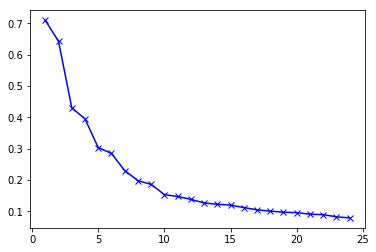

In [155]:
aa=[]
from scipy.spatial.distance import cdist  
K=range(1,25)
for k in range(1,25): 
    kmeans=KMeans(n_clusters=k) 
    kmeans.fit(scaled_df) 
    aa.append(sum(np.min(cdist(scaled_df, kmeans.cluster_centers_, 'euclidean'),axis=1))/scaled_df.shape[0]) 
plt.figure() 
plt.plot(np.array(K), aa, 'bx-') 
plt.show()


In [250]:

df_cluster_bene = pd.DataFrame({'bene_mean':mean_bene,'bene_std':std_bene})
names = df_cluster_bene.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df_cluster_bene)
scaled_df = pd.DataFrame(scaled_df, columns=names)
mod = KMeans(n_clusters=13, n_jobs = -13, max_iter = 500)
mod.fit_predict(scaled_df)



array([7, 7, 6, ..., 0, 0, 0], dtype=int32)